## GRIP-DATA SCIENCE AND BUSINESS ANALYTICS
### TASK 1 PREDICTION USING SUPERVISED MACHINE LEARNING
#### AUTHOR : AIMABLE PARFAIT KAMUGISHA

In [5]:
!pip install matplotlib seaborn selenium

  Using cached selenium-3.141.0-py2.py3-none-any.whl (904 kB)


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
!wget https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

--2021-09-10 10:11:52--  https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 212 [text/plain]
Saving to: 'student_scores - student_scores.csv'

     0K                                                       100% 3.22M=0s

2021-09-10 10:11:53 (3.22 MB/s) - 'student_scores - student_scores.csv' saved [212/212]



In [3]:
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

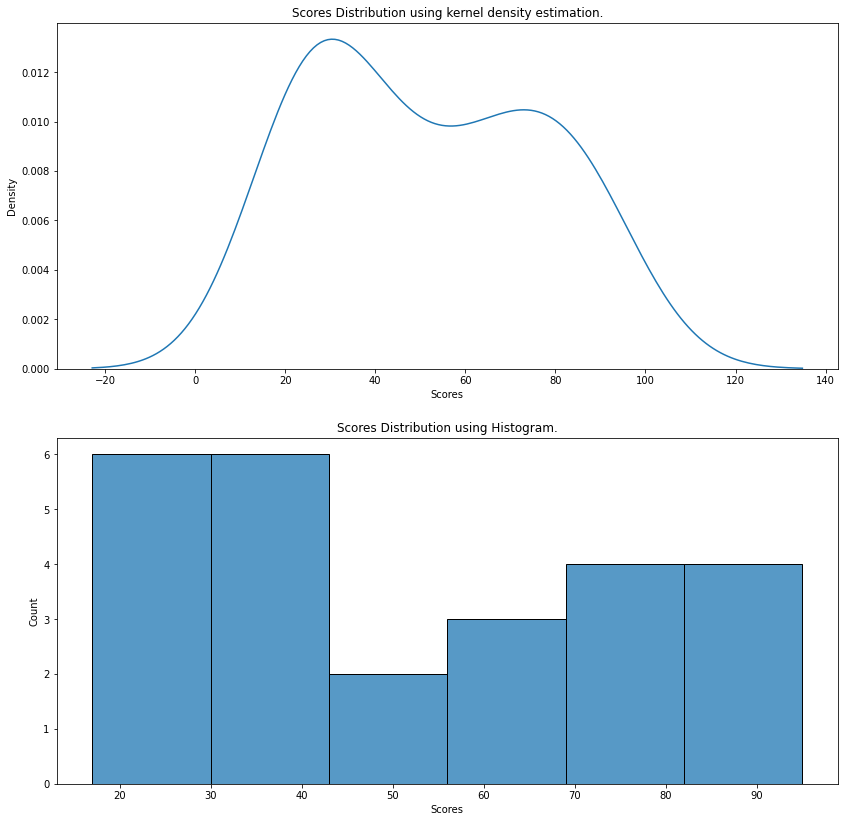

In [19]:
plt.figure(figsize=[14,14])

plt.subplot(2,1,1)
sns.kdeplot(data=df,x='Scores')
plt.title("Scores Distribution using kernel density estimation.",loc='center')

plt.subplot(2,1,2)
sns.histplot(data=df,x='Scores')
plt.title("Scores Distribution using Histogram.",loc='center')
plt.show()

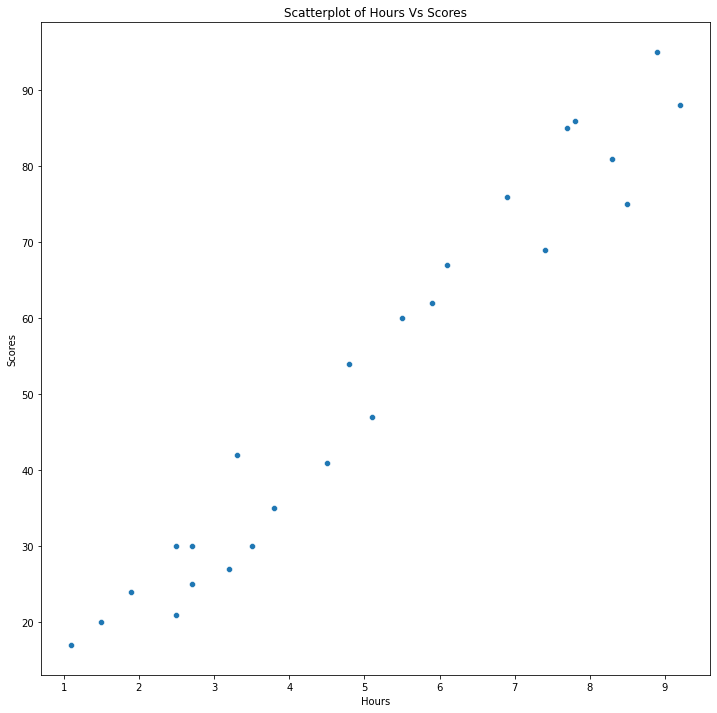

In [44]:
#check correlation between the two variables
plt.figure(figsize=[12,12])
sns.scatterplot(data = df, x='Hours',y='Scores')
plt.title("Scatterplot of Hours Vs Scores",loc='center')
plt.show()

### Exploratory Data Analysis  

From the scatterplot we can conclude that the scores are linearly correlated to the hours spent studying.  
Our data seems to have two modes which might indicate that some students might have cheated.<br/>
Let's try to predict the scores based on the amount of hours spent studying

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
#split the data
X_train,X_test,y_train,y_test = train_test_split(df['Hours'],df['Scores'],test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((20,), (5,), (20,), (5,))

In [26]:
X_train.head()

8     8.3
3     8.5
11    5.9
12    4.5
7     5.5
Name: Hours, dtype: float64

In [27]:
y_train.head()

8     81
3     75
11    62
12    41
7     60
Name: Scores, dtype: int64

In [30]:
#let's create our linear model
lr_model = LinearRegression()
lr_model.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [33]:
#let's evaluate our model
score = lr_model.score(X_train.values.reshape(-1,1),y_train)
print(f'our model score on the training dataset is : {score * 100:.2f}%')

our model score on the training dataset is : 95.63%


In [34]:
#let's try our model on the test data
X_test_reshape = X_test.values.reshape(-1,1)
score_test = lr_model.score(X_test_reshape,y_test)
print(f'our model score on the test dataset is : {score_test * 100:.2f}%')

our model score on the test dataset is : 93.32%


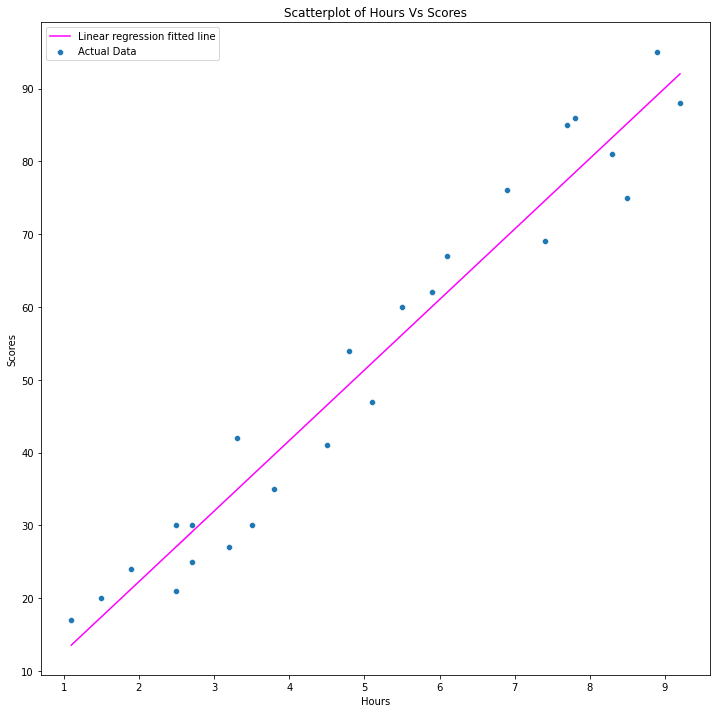

In [47]:
#let's visualize how our model is displayed
y_pred = lr_model.predict(df['Hours'].values.reshape(-1,1))

plt.figure(figsize=[12,12])
sns.scatterplot(data = df, x='Hours',y='Scores',label='Actual Data')
sns.lineplot(x = df['Hours'],y=y_pred,color='magenta',label='Linear regression fitted line')
plt.title("Scatterplot of Hours Vs Scores",loc='center')
plt.legend()
plt.show()

Our model seems to work better on both the training and test datasets, hence we can deploy it to get the score of a student who put in **9.25 hrs/day**

In [40]:
#deploying the model
predicted_score = lr_model.predict([[9.25]])
print(f'The predicted scores of a student who studies 9.25 hrs/day is: {predicted_score[0]:.2f}')

The predicted scores of a student who studies 9.25 hrs/day is: 92.49
